

**Objective:** The primary goal of this project is to extract Forex price data for the EUR/USD currency pair and develop a predictive model to determine whether the next candle (price movement) will be positive or negative.

**Expected Outcomes:**
A robust model that accurately predicts the direction of the next candle for EUR/USD.
A comprehensive report detailing the methodology, analysis, and findings.

## Step 1 Data Collection:
   In May 2010, the financial markets experienced a sudden and severe crash, known as the "Flash Crash." In just a few minutes, the Dow Jones Industrial Average plunged about 1,000 points only to recover those losses shortly after. This event is a crucial example in the world of trading and data analysis.

The Flash Crash highlighted the critical role of data quality and integrity in financial markets. In the chaotic moments of the crash, many automated trading algorithms, including those used in Forex trading, were making decisions based on flawed or aberrant data. This led to a cascade of selling, exacerbating the market's instability.

 Post-crash analyses revealed that many trading models were not equipped to handle such unusual market conditions. They were trained on historical data that did not include such extreme scenarios. This oversight led to massive failures in predictive models, causing significant financial losses.

The Flash Crash served as a wake-up call for financial analysts, traders, and data scientists. It underscored the need for robust data preprocessing and the inclusion of outlier scenarios in model training. It also highlighted the importance of 'stress testing' models against extreme market conditions, something that many Forex predictive models lacked at the time.

Following the Flash Crash, there was a renewed emphasis on improving the quality of data used in trading algorithms and on developing more resilient models that could handle market anomalies. This event has since been a case study in the importance of data quality and the need for comprehensive and realistic model training in the Forex market.


In the execution of this project, you are granted the flexibility to utilize any relevant data sets at your discretion. However, it is imperative to exercise vigilance regarding potential data leakage and ensure strict adherence to chronological integrity. Under no circumstances should data from future timeframes be employed in the model development process. This caution is critical to maintain the validity and reliability of the predictive outcomes of our models.

## Author: Mahdi Bahar Gogani

## Date: 20 February 2024

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import libraries

In [2]:
#Basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

# for visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

#for model training
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score

# Read Data

In [3]:
ds_path = '/content/drive/MyDrive/Colab Notebooks/META.csv'

In [4]:
df_meta = pd.read_csv(ds_path)
df_meta.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
1,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
3,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
4,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800
5,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400
6,2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900
7,2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200
8,2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500
9,2012-06-04,27.200001,27.650000,26.440001,26.900000,26.900000,35230300


In [5]:
df_meta.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2024-02-13,456.869995,467.890015,455.089996,460.119995,460.119995,20916600
2952,2024-02-14,467.929993,474.109985,466.089996,473.279999,473.279999,16858400
2953,2024-02-15,475.279999,488.619995,472.220001,484.029999,484.029999,24212300
2954,2024-02-16,478.109985,478.959991,469.209991,473.320007,473.320007,23306500
2955,2024-02-20,469.720001,476.179993,466.559998,471.750000,471.750000,17935300


## Step 2 Data cleaning and quality checking
Given the data acquired thus far, it is essential to ascertain whether there exists a necessity for data cleaning procedures.This assessment is crucial to ensure the integrity and efficacy of our data-driven analysis and subsequent model development.

In [6]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [7]:
df_meta.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,160.523870,162.617679,158.522067,160.614141,160.614141,3.030812e+07
std,94.292841,95.533217,93.190039,94.388035,94.388035,2.430417e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.467500e+06
25%,81.324998,82.089996,80.700001,81.429998,81.429998,1.631378e+07
50%,156.775002,159.764999,153.830002,155.980004,155.980004,2.276655e+07
75%,207.544998,210.800000,205.759995,208.092499,208.092499,3.503545e+07
max,478.109985,488.619995,472.220001,484.029999,484.029999,3.654579e+08


In [8]:
df_meta.shape

(2956, 7)

In [9]:
# find the most correlation between closing price and the other variables
df_meta.corr()['Close'].sort_values()

Volume      -0.404808
Open         0.999462
High         0.999747
Low          0.999760
Close        1.000000
Adj Close    1.000000
Name: Close, dtype: float64

## Check null values in dataset

In [10]:
num_miss=df_meta.isnull().sum().sum()
print(f'We have {num_miss} missing data')

We have 0 missing data


If we have any missing data, we can consider 4 solutions:

1: dropping rows \
2: Filling the missing values in rows with reasonable values\
3: Remove the Columns with more than 80% missing values\
4:Imputation of Missing Data

# Preprocessing

In [11]:

# Convert 'Date' column to datetime
df_meta['Date'] = pd.to_datetime(df_meta['Date'])

df_meta['Month']= df_meta['Date'].dt.month
df_meta['Year']= df_meta['Date'].dt.year

# Dealing with outliers

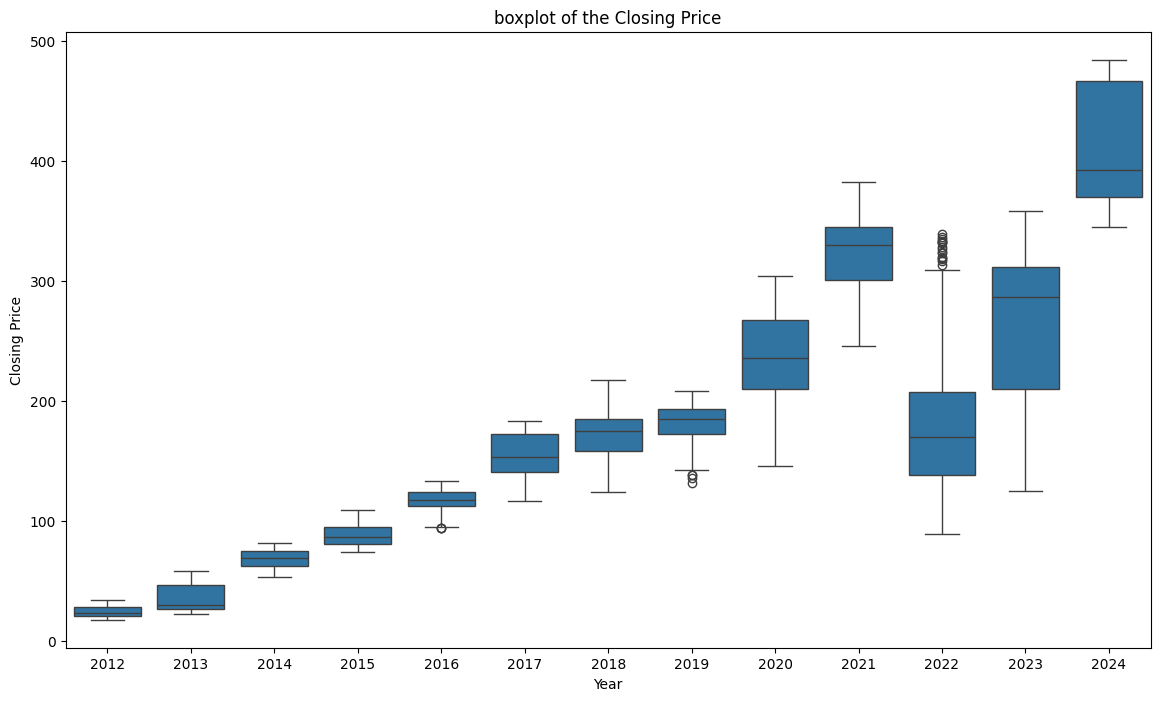

In [12]:
# Create box plots to visualize the monthly variation
plt.figure(figsize=(14, 8))
sns.boxplot(data= df_meta, x=df_meta['Year'], y=df_meta['Close'])
plt.title('boxplot of the Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

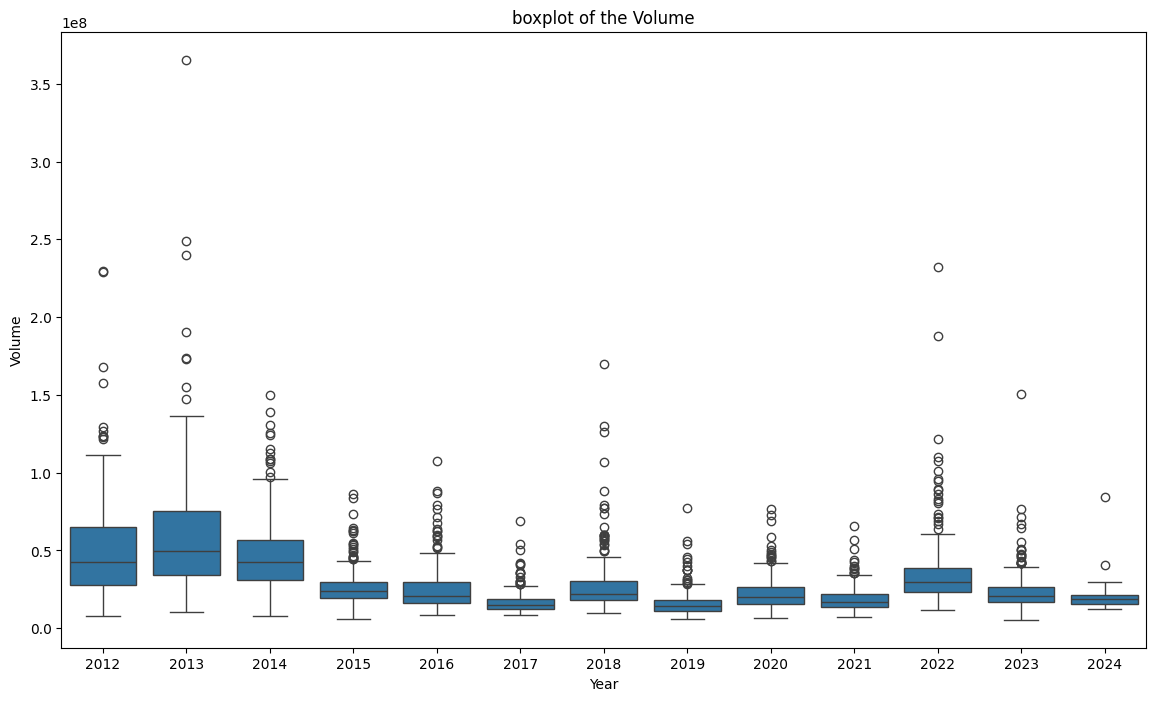

In [13]:
# Create box plots to visualize the monthly variation and delete outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data= df_meta, x=df_meta['Year'], y=df_meta['Volume'])
plt.title('boxplot of the Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

In [14]:
# Calculate the interquartile range (IQR) for each year
iqr_by_year = df_meta.groupby('Year')['Volume'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Identify the outliers for each year
def detect_outliers(group):
    year = group.name
    iqr = iqr_by_year.loc[year]
    lower_bound = group['Volume'].quantile(0.25) - 1.5 * iqr
    upper_bound = group['Volume'].quantile(0.75) + 1.5 * iqr
    return group[(group['Volume'] < lower_bound) | (group['Volume'] > upper_bound)]



In [15]:
outliers_by_year = df_meta.groupby('Year').apply(detect_outliers)

# Remove the outliers
outlier_indices = outliers_by_year.index.get_level_values(1)
df_meta = df_meta.drop(outlier_indices)

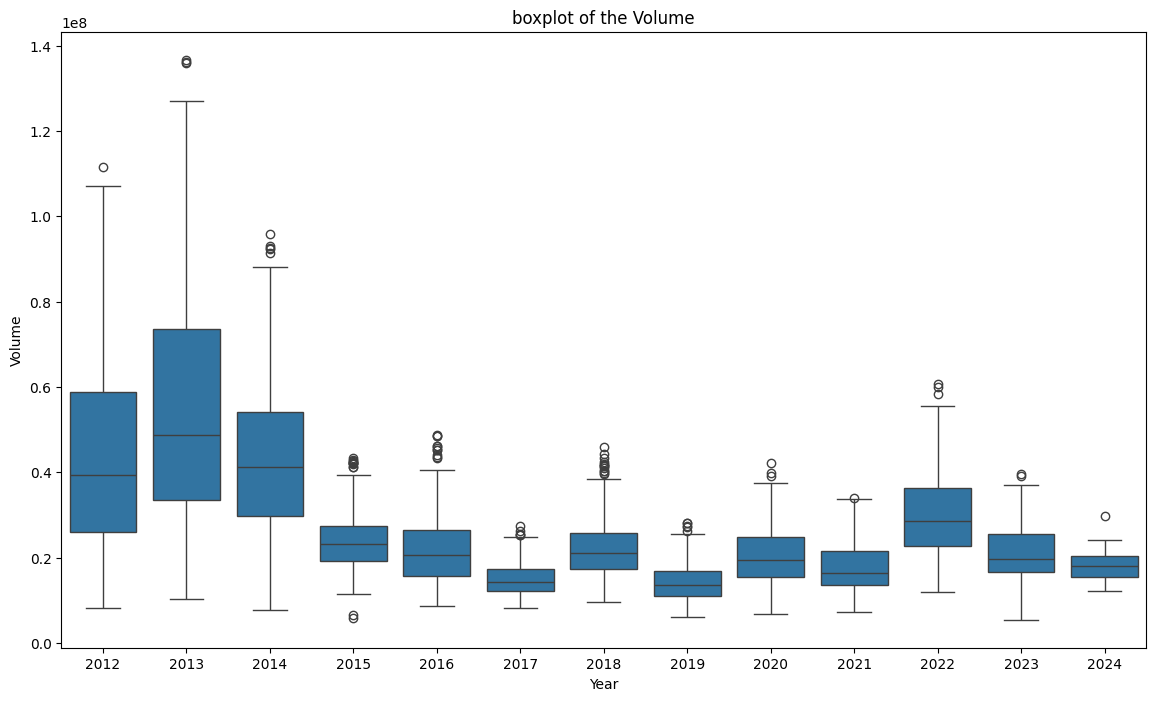

In [16]:
# Create box plots to visualize the monthly variation and delete outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data= df_meta, x=df_meta['Year'], y=df_meta['Volume'])
plt.title('boxplot of the Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

As you can see, most of the outliers in Volume are removed.
So, the perfomance of the model can be improved

In [17]:
df_meta

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year
1,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,5,2012
2,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,5,2012
3,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,5,2012
4,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800,5,2012
5,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400,5,2012
...,...,...,...,...,...,...,...,...,...
2951,2024-02-13,456.869995,467.890015,455.089996,460.119995,460.119995,20916600,2,2024
2952,2024-02-14,467.929993,474.109985,466.089996,473.279999,473.279999,16858400,2,2024
2953,2024-02-15,475.279999,488.619995,472.220001,484.029999,484.029999,24212300,2,2024
2954,2024-02-16,478.109985,478.959991,469.209991,473.320007,473.320007,23306500,2,2024


# Visualization

<Axes: >

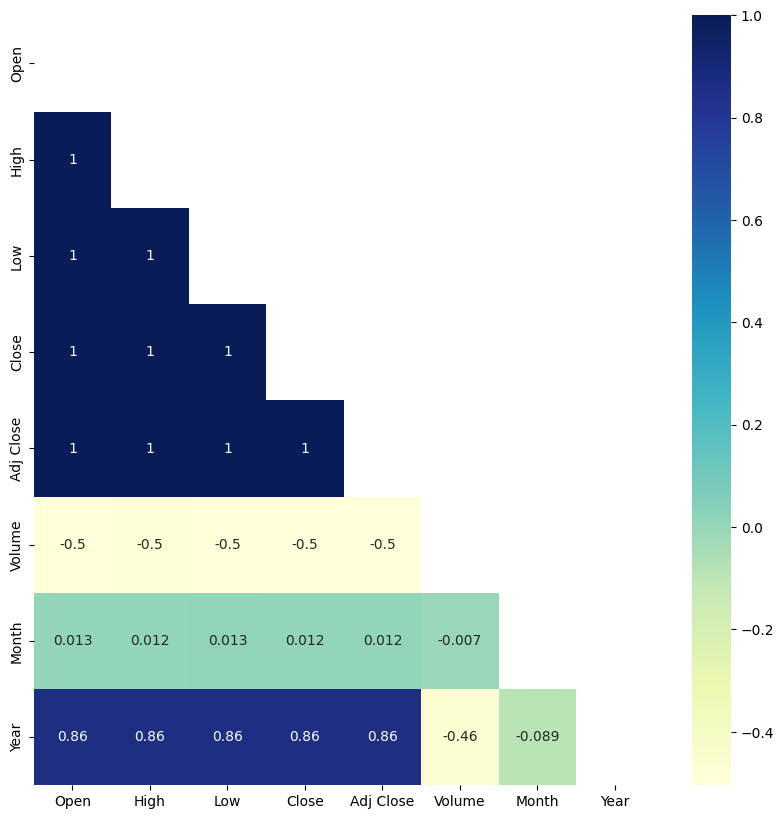

In [18]:
#using heatmap to show correlation
mask = np.triu(np.ones_like(df_meta.corr()))
fig= plt.figure(figsize=(10,10))
sns.heatmap(data=df_meta.corr(),cmap="YlGnBu", annot=True, mask=mask)

It is obvious that Closing Price has strongly correlation with Open, High, Low and year.

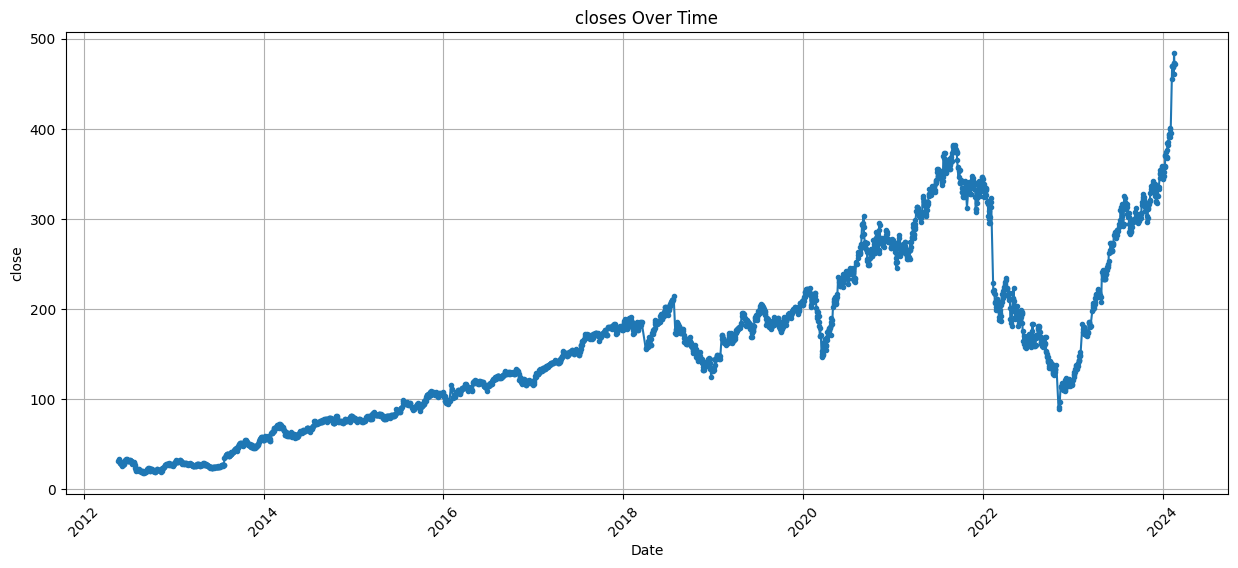

In [19]:
# Line Chart of closes Over Time

plt.figure(figsize=(15, 6))
plt.plot(df_meta['Date'], df_meta['Close'], marker='.')
plt.title('closes Over Time')
plt.xlabel('Date')
plt.ylabel('close')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

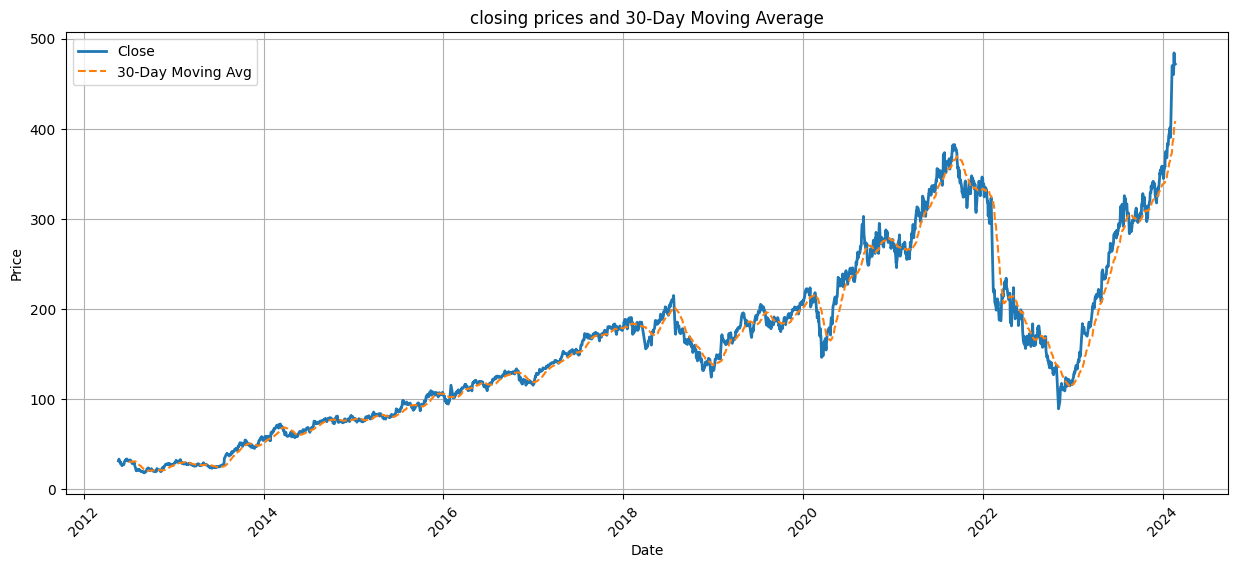

In [20]:
# closing prices and Moving Average plot

window = 30
plt.figure(figsize=(15, 6))
plt.plot(df_meta['Date'], df_meta['Close'], label='Close', linewidth=2)
plt.plot(df_meta['Date'], df_meta['Close'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'closing prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

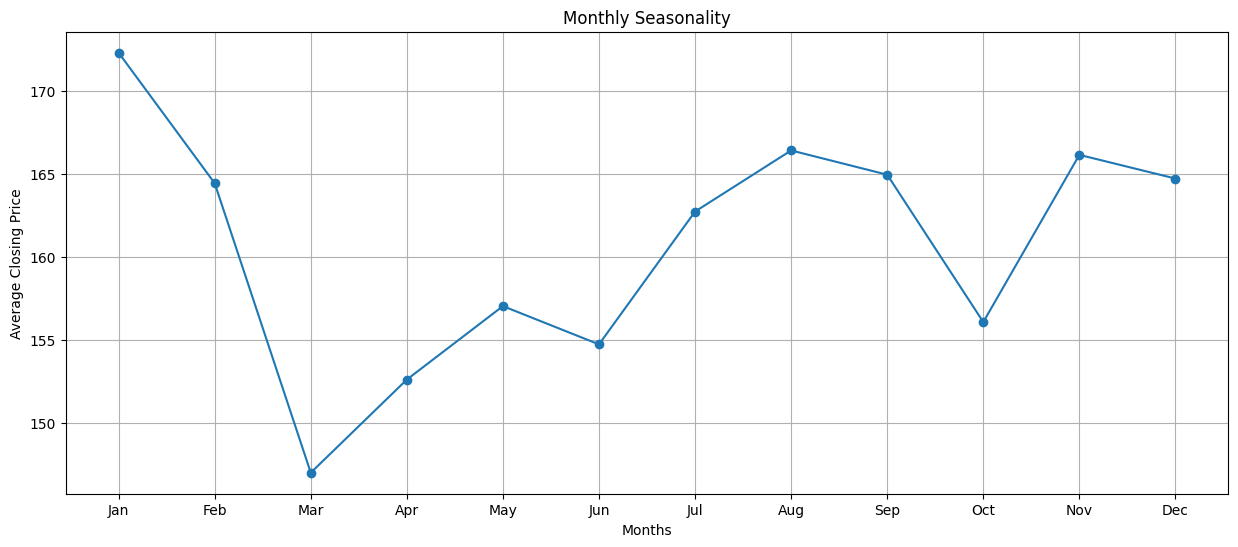

In [21]:
# Monthly Seasonality of Closing Prices

monthly_average = df_meta.groupby('Month')['Close'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title(f'Monthly Seasonality')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## Step 3 Feature Enginnering And Data Labelling

Price data, typically including open, high, low, and close prices, along with volume, is fundamental in Forex trading models. However, relying solely on this data might not always suffice for accurate predictions.
Forex markets are influenced by a plethora of factors, including economic indicators, geopolitical events, and market sentiment. Therefore, price data alone might not capture the full spectrum of influences affecting market movements.


 - Technical Indicators: Derive technical indicators like Moving Averages, Relative Strength Index (RSI), Bollinger Bands, and MACD. These indicators can help capture trends, momentum, volatility, and market strength.
 - Statistical Features: Use statistical measures like rolling mean, standard deviation, and z-scores over different time windows to capture market dynamics.
 - Time-Based Features: Incorporate features like time of day, day of the week, and proximity to major financial events, as Forex markets can exhibit time-based patterns.


In [22]:
# Create some new features

df_meta['quarter'] = df_meta['Date'].dt.quarter
df_meta['dayofweek'] = df_meta['Date'].dt.dayofweek
df_meta['days'] = df_meta['Date'].dt.day
df_meta['week'] = df_meta['Date'].dt.strftime('%U')
df_meta['week'] = pd.to_numeric(df_meta['week'])

In [23]:
df_meta.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Month',
       'Year', 'quarter', 'dayofweek', 'days', 'week'],
      dtype='object')

In [24]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 1 to 2955
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2758 non-null   datetime64[ns]
 1   Open       2758 non-null   float64       
 2   High       2758 non-null   float64       
 3   Low        2758 non-null   float64       
 4   Close      2758 non-null   float64       
 5   Adj Close  2758 non-null   float64       
 6   Volume     2758 non-null   int64         
 7   Month      2758 non-null   int64         
 8   Year       2758 non-null   int64         
 9   quarter    2758 non-null   int64         
 10  dayofweek  2758 non-null   int64         
 11  days       2758 non-null   int64         
 12  week       2758 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 301.7 KB


## Step 3 Train Test Split

In the context of our project's methodology, the concept of 'train-test split' is a critical procedure in the development of predictive models. This process involves dividing the collected data into two distinct sets: the training set and the test set.

**Training Set:** This subset of data is utilized for the initial development and training of the model. It is through this dataset that the model learns the underlying patterns and relationships, essentially 'training' the algorithm to understand and interpret the data. The size of the training set typically ranges from 60% to 80% of the total dataset, depending on the specific requirements and complexity of the model.

**Test Set:** The remaining portion of the data, which is not used in the training phase, constitutes the test set. This set is crucial for evaluating the performance and generalizability of the model. It serves as a new, unseen dataset for the model, allowing us to assess how well the model can apply its learned patterns to new data. The test set typically comprises 20% to 40% of the total dataset.

**Objective of Train-Test Split:** The primary objective of this split is to prevent overfitting, where a model performs exceptionally well on training data but poorly on new, unseen data. By evaluating the model on the test set, we can gauge its ability to generalize to new data, which is a crucial indicator of its practical applicability.

**Chronological Consideration:** In time-series data, such as Forex market data, it is vital that this split respects the chronological order of the data. This means that the training set consists of earlier data, while the test set comprises the most recent data. Such an approach ensures that the model is not inadvertently exposed to future data during training, maintaining the integrity and relevance of our predictive analysis.


# getting the closing price in order to predict

In [25]:
meta_close = df_meta.reset_index()['Close']

In [26]:
meta_close.shape

(2758,)

# Normalization

In [27]:
# Normalizing our data using MinMaxScaler
scaler = MinMaxScaler()
scaled_close=scaler.fit_transform(np.array(meta_close).reshape(-1,1))

In [28]:
scaled_close

array([[0.02845807],
       [0.03060262],
       [0.03281149],
       ...,
       [1.        ],
       [0.97703197],
       [0.97366502]])

# Split test and train data

In [29]:
# Split into training and testing sets
train_size = int(len(scaled_close) * 0.8)  # 80% for training
train_data= scaled_close[:train_size]
test_data = scaled_close[train_size:]

In [30]:
# Define the sequence length (number of past time steps)
n_past = 50

# Prepare sequences for LSTM
X_train = []
y_train = []

for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [31]:
# prepare sequences for the test set
X_test = []
y_test = []

for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)

In [32]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)

Training set size:-
(2156, 50)
(2156,)


(None, None)

In [33]:
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Testing set size:-
(502, 50)
(502,)


(None, None)

In [34]:
# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [35]:
X_train.shape , X_test.shape

((2156, 50, 1), (502, 50, 1))